#**Chicago Taxi Trips**

**Data**

https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew/data




**Importing Libraries**

In [1]:
import pandas as pd                         
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')  

**Loading the Data**

In [2]:
Trips= pd.read_csv('/content/TaxiTrips_chunk.csv')

**Description about the Dataframe**

In [3]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99743 entries, 0 to 99742
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  99743 non-null  int64  
 1   Trip ID                     99743 non-null  object 
 2   Taxi ID                     99743 non-null  object 
 3   Trip Start Timestamp        99743 non-null  object 
 4   Trip End Timestamp          99705 non-null  object 
 5   Trip Seconds                96960 non-null  float64
 6   Trip Miles                  99743 non-null  float64
 7   Pickup Census Tract         66796 non-null  float64
 8   Dropoff Census Tract        66355 non-null  float64
 9   Pickup Community Area       89030 non-null  float64
 10  Dropoff Community Area      87392 non-null  float64
 11  Fare                        99743 non-null  float64
 12  Tips                        99743 non-null  float64
 13  Tolls                       995

**Drop Unnamed column**

In [4]:
Trips=Trips.drop("Unnamed: 0",axis=1)

**Check for Data types**

In [5]:
Trips.dtypes


Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

We can see "Trp Start Timestamp", "Trip End Timestamp" are represented as object data type, need to be changed as Datatime



**Change the DataTypes**

In [6]:
Trips['Trip Start Timestamp']=pd.to_datetime(Trips['Trip Start Timestamp'],errors='coerce')
Trips['Trip End Timestamp']=pd.to_datetime(Trips['Trip End Timestamp'],errors='coerce')

**Histograms representation of features in Dataframe**

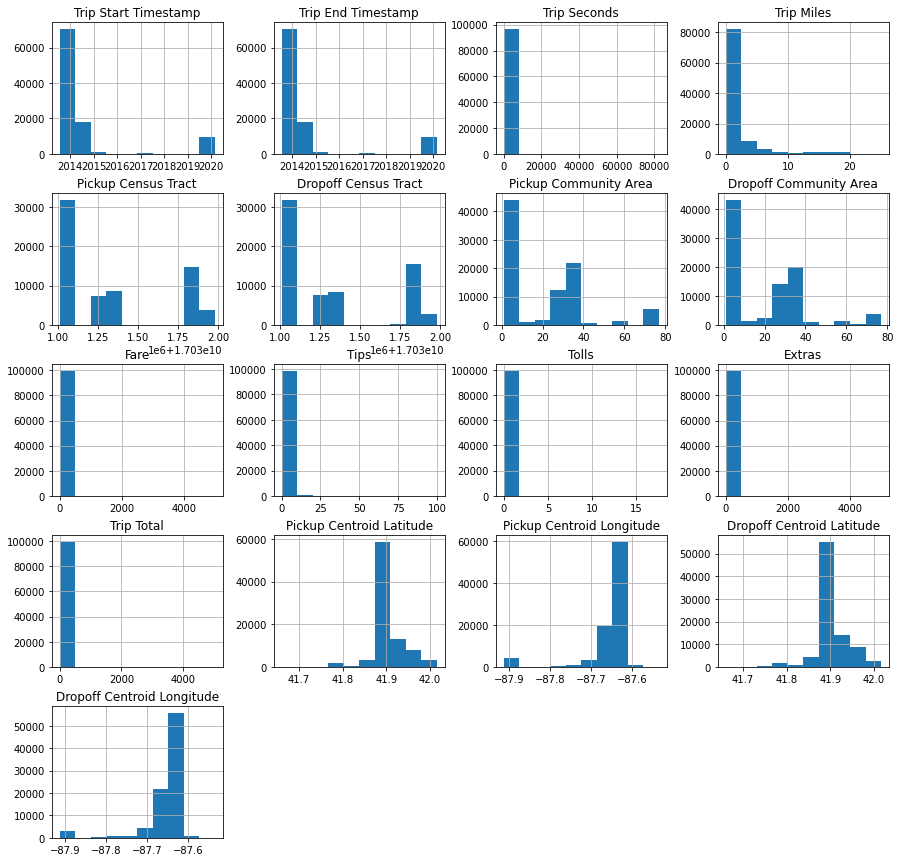

In [7]:
plt.rcParams["figure.figsize"] = (15,15)
Trips.hist()
plt.show()

I have considered  trips if the Trip Miles is more than 0. So I have taken a new Dataset having miles more than 0 for future analysis.

In [8]:
Taxis = Trips[(Trips['Trip Miles']!= 0)]
Taxis.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,6b39a1a9f0a0c43d143b8c6b64e670508784b274,11bf41ca022245921f29bf136908c1605da3b5ad5e76fe...,2014-01-16 14:45:00,2014-01-16 15:15:00,1380.0,3.9,NaN,NaN,8.0,24.0,...,0.0,17.55,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
1,e382992537a91c0421203b9aee7b651aedbf293a,4388ce18f1c58dc7660241a6c4133c135be764cc2abf75...,2014-01-21 12:00:00,2014-01-21 12:00:00,180.0,0.7,NaN,NaN,7.0,7.0,...,0.0,4.65,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
4,a3692a89dfc322db8b2d045ae3e910ad1a7b3a21,ab6b0472a82102ae6875f5297519510f5664a3b4a3559e...,2014-07-29 18:15:00,2014-07-29 18:30:00,900.0,2.3,NaN,NaN,32.0,28.0,...,0.0,11.85,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
5,9ddcd3eb46b8e80d7da4cca5c710db0ff268c790,dedd84a3aba1c80512f36b0685619a6fd03320e86853f3...,2013-12-10 11:15:00,2013-12-10 11:15:00,240.0,0.7,NaN,NaN,24.0,24.0,...,0.0,4.85,Cash,Dispatch Taxi Affiliation,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
6,a4e38bfe3e9cd18c231898ac2128fd3a9158dc56,d3068a62a49dbec13e21fe5232de4358a74e761cce0091...,2014-01-25 02:15:00,2014-01-25 02:15:00,420.0,1.1,1.703132e+10,1.703108e+10,32.0,8.0,...,1.5,7.75,Cash,Northwest Management LLC,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


**Checking for Nullvalues**


In [9]:
Nullcheck = Taxis.isnull().sum()/(len(Taxis))*100 
Nullcheck

Trip ID                        0.000000
Taxi ID                        0.000000
Trip Start Timestamp           0.000000
Trip End Timestamp             0.000000
Trip Seconds                   0.003513
Trip Miles                     0.000000
Pickup Census Tract           29.205530
Dropoff Census Tract          29.323216
Pickup Community Area          3.602607
Dropoff Community Area         5.100912
Fare                           0.000000
Tips                           0.000000
Tolls                          0.309146
Extras                         0.000000
Trip Total                     0.000000
Payment Type                   0.000000
Company                        1.786373
Pickup Centroid Latitude       3.602607
Pickup Centroid Longitude      3.602607
Pickup Centroid Location       3.602607
Dropoff Centroid Latitude      4.925260
Dropoff Centroid Longitude     4.925260
Dropoff Centroid  Location     4.925260
dtype: float64

**Bar Plotting of Missing Values**

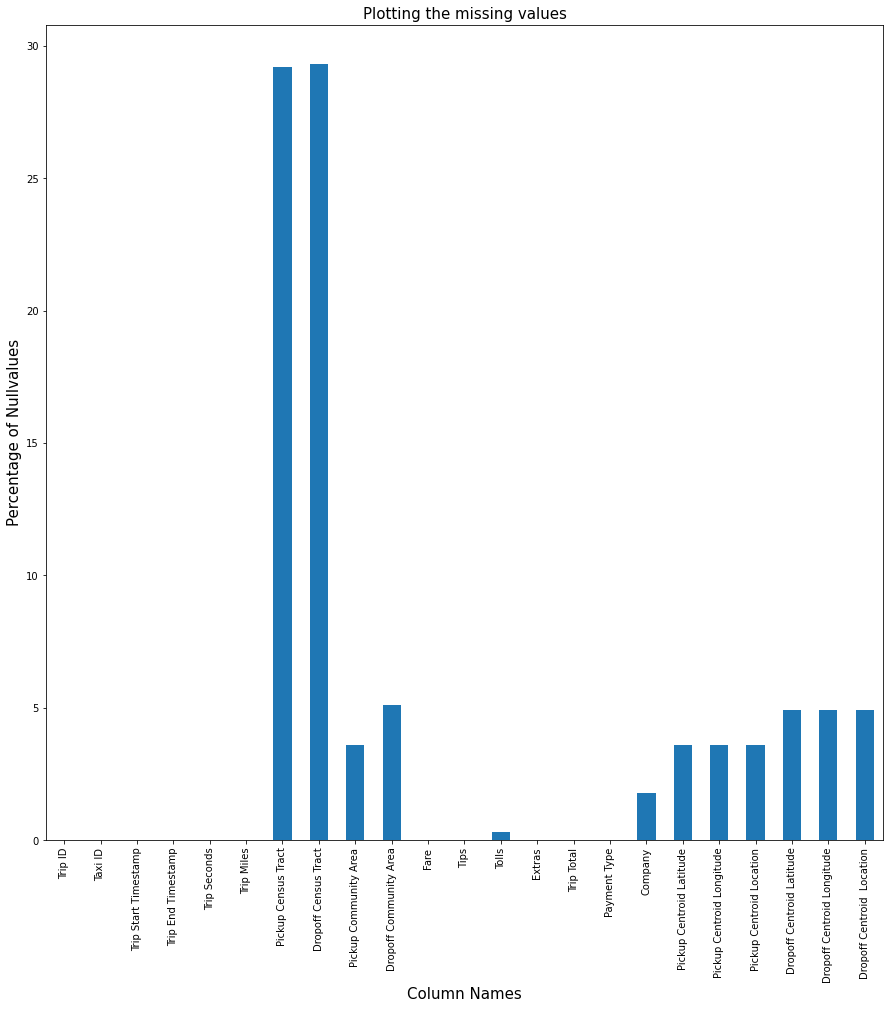

In [10]:
Nullcheck.plot(kind="bar")
plt.title("Plotting the missing values",fontsize=15)
plt.xlabel("Column Names",fontsize=15)
plt.ylabel("Percentage of Nullvalues",fontsize=15) 
plt.show()

We can observe that Most of the null values are available in pickup and drop off locations and their codes. We are not removing any null values since the perecentage is only around 30%.

**Range of the Dataframe**

In [11]:
print("rows = ",Taxis.shape[0])
print("columns = ",Taxis.shape[1])

rows =  56931
columns =  23


**Checking for the data**

In [12]:
Taxis.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,6b39a1a9f0a0c43d143b8c6b64e670508784b274,11bf41ca022245921f29bf136908c1605da3b5ad5e76fe...,2014-01-16 14:45:00,2014-01-16 15:15:00,1380.0,3.9,NaN,NaN,8.0,24.0,...,0.0,17.55,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
1,e382992537a91c0421203b9aee7b651aedbf293a,4388ce18f1c58dc7660241a6c4133c135be764cc2abf75...,2014-01-21 12:00:00,2014-01-21 12:00:00,180.0,0.7,NaN,NaN,7.0,7.0,...,0.0,4.65,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
4,a3692a89dfc322db8b2d045ae3e910ad1a7b3a21,ab6b0472a82102ae6875f5297519510f5664a3b4a3559e...,2014-07-29 18:15:00,2014-07-29 18:30:00,900.0,2.3,NaN,NaN,32.0,28.0,...,0.0,11.85,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
5,9ddcd3eb46b8e80d7da4cca5c710db0ff268c790,dedd84a3aba1c80512f36b0685619a6fd03320e86853f3...,2013-12-10 11:15:00,2013-12-10 11:15:00,240.0,0.7,NaN,NaN,24.0,24.0,...,0.0,4.85,Cash,Dispatch Taxi Affiliation,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
6,a4e38bfe3e9cd18c231898ac2128fd3a9158dc56,d3068a62a49dbec13e21fe5232de4358a74e761cce0091...,2014-01-25 02:15:00,2014-01-25 02:15:00,420.0,1.1,1.703132e+10,1.703108e+10,32.0,8.0,...,1.5,7.75,Cash,Northwest Management LLC,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


**Statistics of a Dataframe**

In [13]:
Taxis.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,56929.000000,56931.000000,4.030400e+04,4.023700e+04,54880.000000,54027.000000,56931.000000,56931.000000,56755.000000,56931.000000,56931.000000,54880.000000,54880.000000,54127.000000,54127.000000
mean,804.669711,2.993225,1.703135e+10,1.703134e+10,22.046993,20.829085,12.015805,1.074787,0.001266,0.950497,14.064564,41.902707,-87.656391,41.902701,-87.653913
std,875.117359,4.297643,3.357046e+05,3.308747e+05,18.878816,17.344961,23.002215,2.149682,0.088797,27.035743,36.077887,0.037599,0.064867,0.038287,0.055058
min,0.000000,0.010000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.673820,-87.913625,41.660136,-87.913625
25%,360.000000,0.700000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.250000,0.000000,0.000000,0.000000,7.050000,41.880994,-87.655998,41.880994,-87.657005
50%,600.000000,1.300000,1.703124e+10,1.703124e+10,15.000000,14.000000,8.250000,0.000000,0.000000,0.000000,9.550000,41.892508,-87.633308,41.893216,-87.635760
75%,960.000000,3.100000,1.703183e+10,1.703183e+10,32.000000,32.000000,13.000000,2.000000,0.000000,1.000000,14.450000,41.921877,-87.626215,41.922686,-87.626215
max,71448.000000,25.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,5000.800000,50.000000,17.580000,5011.110000,5022.960000,42.015697,-87.534903,42.015934,-87.534903


##**Exploratory Data Analysis(EDA)**

**Splitting the timestamps**

In [14]:
Taxis['Start Date']=Taxis['Trip Start Timestamp'].dt.day
Taxis['Start Month']=Taxis['Trip Start Timestamp'].dt.month
Taxis['Start Year']=Taxis['Trip Start Timestamp'].dt.year

**In which year did the highest number of trips occured?**

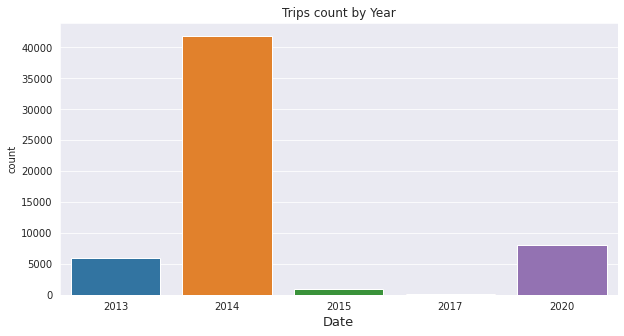

In [15]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Start Year",data=Taxis)
plt.title("Trips count by Year")
plt.xlabel("Date",fontsize=13)
plt.show()

In [16]:
Taxis['Start Year'].unique()

array([2014, 2013, 2020, 2015, 2017])

From the graph above we can say year 2014 has recorded the highest number of trips.

**On which day of the month most of trips happend?**

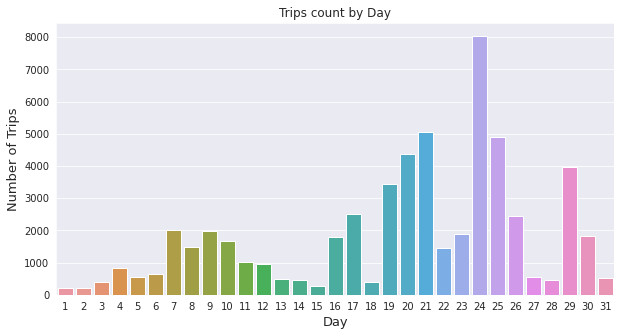

In [17]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Start Date",data=Taxis)
plt.title("Trips count by Day")
plt.xlabel("Day",fontsize=13)
plt.ylabel("Number of Trips", fontsize=13)
plt.show()

Increase in trip count  are seen from the second half of the month. 

**Which month had highest count of trips ?**



In [18]:
Taxis['month_name'] = Taxis['Trip Start Timestamp'].dt.month_name()
Taxis['month_name']

0         January
1         January
4            July
5        December
6         January
           ...   
99736    February
99737     January
99740        July
99741     January
99742     January
Name: month_name, Length: 56931, dtype: object

In [19]:
Months = ['January','February','March','April','May','June', 'July','August','September','October','November','December']
mapping = {day: i for i, day in enumerate(Months)}
key = Taxis['month_name'].map(mapping)
monthname= Taxis.iloc[key.argsort()].set_index('month_name')
monthname.reset_index(inplace=True)

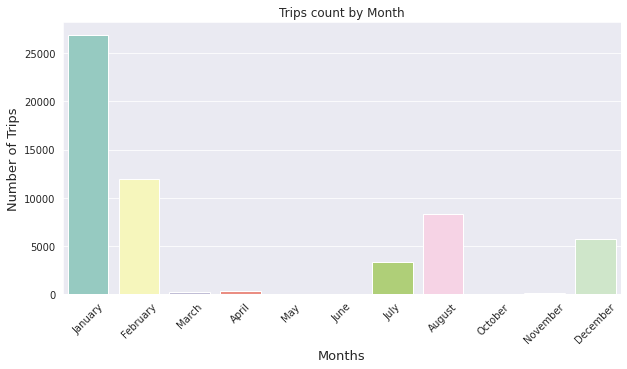

In [20]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
chart=sns.countplot(x="month_name",data=monthname,palette="Set3")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title("Trips count by Month")
plt.xlabel("Months",fontsize=13)
plt.ylabel("Number of Trips", fontsize=13)
plt.show()

In [21]:
Taxis['month_name'].unique()

array(['January', 'July', 'December', 'August', 'February', 'March',
       'April', 'October', 'June', 'November', 'May'], dtype=object)

We can see majority of trips are done in the month of January.

**Highest number of trips in a week**

In [22]:
Taxis['week_day']=Taxis['Trip Start Timestamp'].dt.weekday+1
Taxis['week_day']

0        4
1        2
4        2
5        2
6        6
        ..
99736    4
99737    2
99740    6
99741    5
99742    4
Name: week_day, Length: 56931, dtype: int64

In [23]:
Taxis['week_name']= Taxis['Trip Start Timestamp'].dt.day_name()
Taxis['week_name']


0        Thursday
1         Tuesday
4         Tuesday
5         Tuesday
6        Saturday
           ...   
99736    Thursday
99737     Tuesday
99740    Saturday
99741      Friday
99742    Thursday
Name: week_name, Length: 56931, dtype: object

In [24]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = Taxis['week_name'].map(mapping)
weekday= Taxis.iloc[key.argsort()].set_index('week_name')
weekday.reset_index(inplace=True)

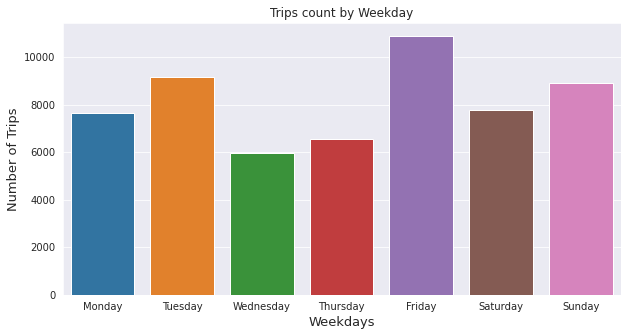

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="week_name",data=weekday)
plt.title("Trips count by Weekday")
plt.xlabel("Weekdays",fontsize=13)
plt.ylabel("Number of Trips", fontsize=13)
plt.show()

We can observe from the graph that more than 15000 people use cabs on Friday, Tuesday and Sunday when compare to remaining days.

**Which hour in a day recorded highest number of trips?**

In [26]:
Taxis['hour'] = Taxis['Trip Start Timestamp'].dt.hour

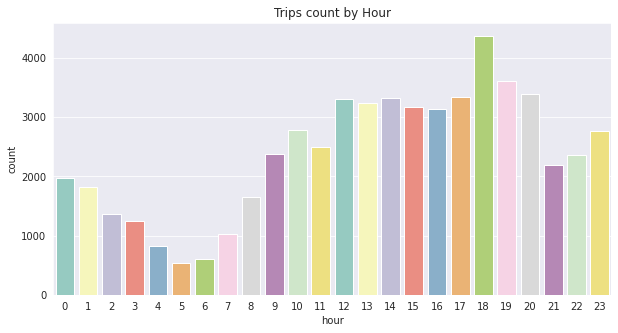

In [27]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="hour",data=Taxis,palette="Set3")
plt.title("Trips count by Hour")
plt.show()

Most of the trips are taken place from the second half of the day

**Pickup Community Area**


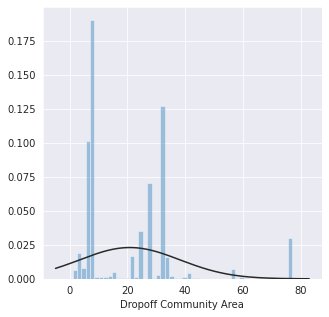

In [28]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.distplot(Taxis["Dropoff Community Area"], fit=norm, kde=False)
plt.show()

**Dropoff Community Area**

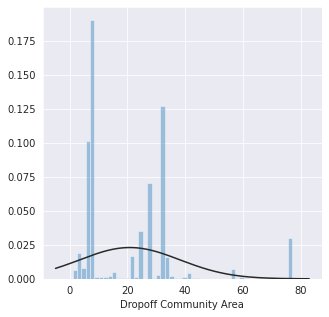

In [29]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
#sns.distplot(Taxis["Dropoff Community Area"], rug=True, hist=False)
sns.distplot(Taxis["Dropoff Community Area"], fit=norm, kde=False)
#sns.distplot(Taxis["Dropoff Community Area"])
plt.show()

Seem's like their is no much difference between pick up community area and drop off community area. So i have checked for correlation between them, which say's there is not much correlation. Based on this I conclude that they are not correlated and keep both the columns.

In [30]:
Taxis['Pickup Community Area'].corr(Taxis['Dropoff Community Area'])

0.08342659184163868

**Distribution on Fare Trip**

In [31]:
fare_min=Taxis['Fare'].min()
fare_max=Taxis['Fare'].max()
print("maximum cost =",fare_max)
print("minimum cost =",fare_min)

maximum cost = 5000.8
minimum cost = 0.0


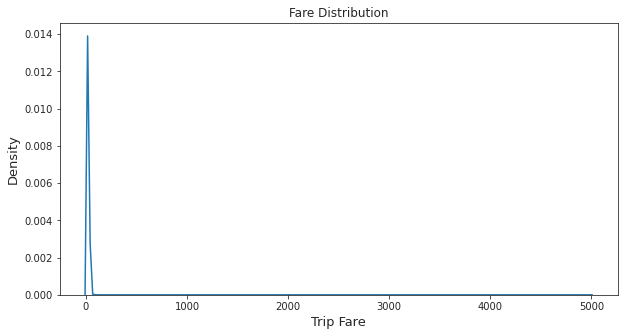

In [32]:
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.kdeplot(data=Taxis["Fare"])
plt.title("Fare Distribution")
plt.xlabel("Trip Fare",fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.show()

To visualize the graph range is more . As the majority of fare is around 100, so i have limited it to 100 and considered remaning values as outliers.

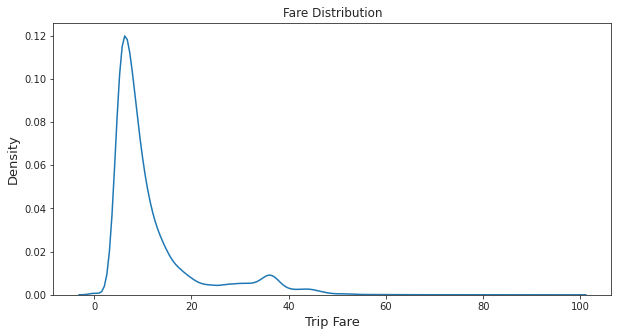

In [33]:
Taxis_fare=Taxis[Taxis["Fare"]<=100]
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.kdeplot(data=Taxis_fare["Fare"])
plt.title("Fare Distribution")
plt.xlabel("Trip Fare",fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.show()

From the above graph we can say that most of the trips are of low cost and peak around $10.

**Payment Methods**

In [34]:
Taxis['Payment Type'].unique()

array(['Credit Card', 'Cash', 'No Charge', 'Mobile', 'Unknown', 'Prcard',
       'Dispute', 'Prepaid'], dtype=object)

In [35]:
Taxis['Payment Type'].value_counts()

Cash           37163
Credit Card    18650
No Charge        518
Mobile           221
Prcard           161
Unknown          160
Dispute           57
Prepaid            1
Name: Payment Type, dtype: int64

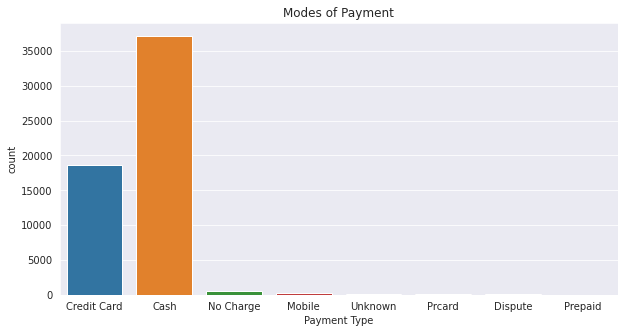

In [36]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Payment Type",data=Taxis)
plt.title("Modes of Payment")
plt.show()

In [37]:
Taxis['Company'].nunique()

98

Total amount of the Trip Company wise

In [38]:
Totalamount= Taxis[['Trip Total', 'Company']].groupby('Company').sum()
Totalamount.sort_values(by='Trip Total', inplace=True, ascending=False)
Totalamount.reset_index(inplace=True)
Totalamount

,Company,Trip Total
0,Taxi Affiliation Services,380235.35
1,Dispatch Taxi Affiliation,119586.52
2,Choice Taxi Association,66794.48
3,Blue Ribbon Taxi Association Inc.,37274.47
4,KOAM Taxi Association,29983.47
...,...,...
93,6057 - 24657 Richard Addo,7.25
94,3556 - 36214 RC Andrews Cab,6.00
95,3011 - JBL Cab Inc.,5.85
96,5074 - 54002 Ahzmi Inc,5.65


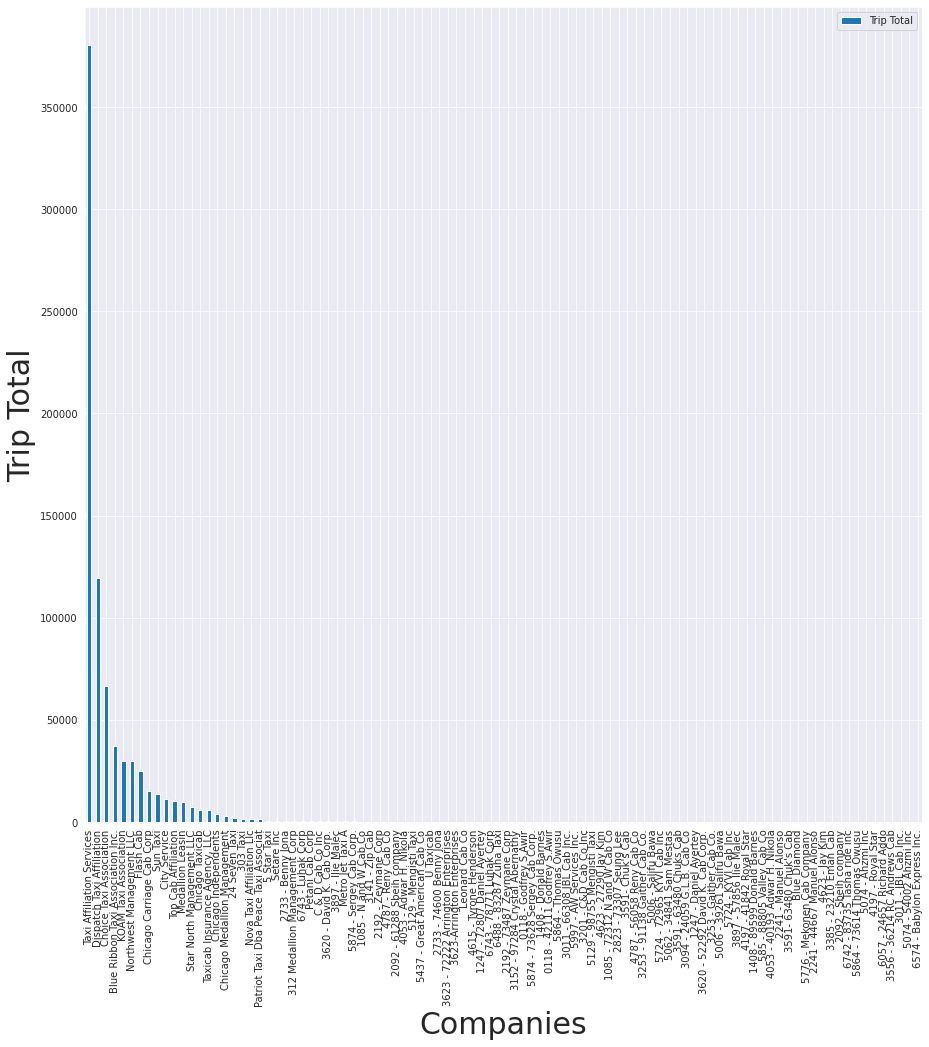

In [39]:
Totalamount.plot.bar(x='Company',y='Trip Total')
plt.xlabel('Companies',fontsize=30)
plt.ylabel('Trip Total',fontsize=30)
#plt.figure(figsize=(40,5))
plt.rcParams["figure.figsize"] = [30, 30]

Top 10 companies with Total Trip Count

In [40]:
(Totalamount.nlargest(10,['Trip Total']))

,Company,Trip Total
0,Taxi Affiliation Services,380235.35
1,Dispatch Taxi Affiliation,119586.52
2,Choice Taxi Association,66794.48
3,Blue Ribbon Taxi Association Inc.,37274.47
4,KOAM Taxi Association,29983.47
5,Northwest Management LLC,29694.72
6,Flash Cab,25031.40
7,Chicago Carriage Cab Corp,14925.34
8,Sun Taxi,13467.06
9,City Service,11044.06


Least 10 countires with Total Trip count

In [41]:
(Totalamount.nsmallest(10,['Trip Total']))

,Company,Trip Total
97,6574 - Babylon Express Inc.,5.25
96,5074 - 54002 Ahzmi Inc,5.65
95,3011 - JBL Cab Inc.,5.85
94,3556 - 36214 RC Andrews Cab,6.00
92,4197 - Royal Star,7.25
93,6057 - 24657 Richard Addo,7.25
91,5074 - Ahzmi Inc,10.45
90,5864 - 73614 Thomas Owusu,11.90
89,6742 - 83735 Tasha ride inc,12.00
88,2092 - Sbeih company,12.25


**Correlation**

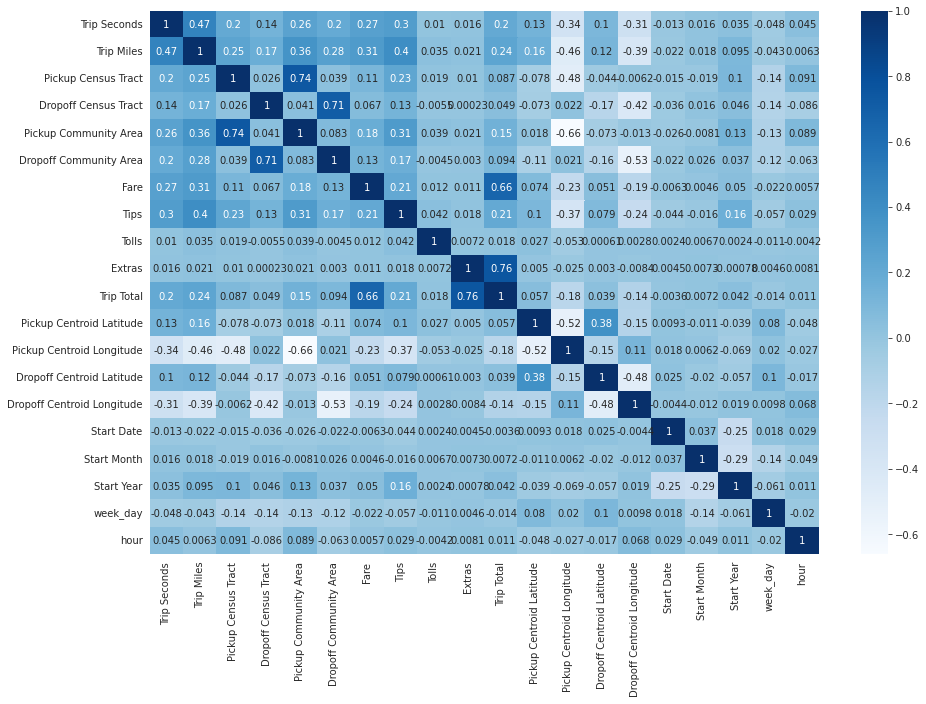

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(Taxis.corr(),annot=True,cmap="Blues")

Almost all the columns show low to moderate correlation. Therefore, I will not remove any columns based on the correlation between the different columns.
This will be the final dataset that will be used for the modeling.

References:
1.  https://matplotlib.org/stable/api/matplotlib_configuration_api.html
2. https://stackoverflow.com/questions/35193808/
3. https://www.kaggle.com/fevsea/how-much-will-it-cost-me-pre-ride-regression
4. https://seaborn.pydata.org/generated/seaborn.kdeplot.html